In [1]:
# Importing the libraries

import yfinance as yf
import riskfolio as rp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings 
warnings.filterwarnings("ignore")

In [2]:
# Chossing of assets

assets = ['AUROPHARMA.NS','BHARTIARTL.NS','BSOFT.NS','BPCL.NS','HDFCBANK.NS','HINDUNILVR.NS','ICICIBANK.NS','INDHOTEL.NS','INFY.NS','IRCTC.NS','ITC.NS',
          'JIOFIN.NS','LT.NS','MARUTI.NS','M&M.NS','NTPC.NS','ONGC.NS','RELIANCE.NS','SBIN.NS','SUNPHARMA.NS','TATAMOTORS.NS','TATAPOWER.NS','TCS.NS',
          'TATASTEEL.NS','VEDL.NS']
data = yf.download(assets, start = '2024-01-01', end = '2024-12-31')['Adj Close']

[*********************100%***********************]  25 of 25 completed


In [3]:
# Displaying the data

data

Ticker,AUROPHARMA.NS,BHARTIARTL.NS,BPCL.NS,BSOFT.NS,HDFCBANK.NS,HINDUNILVR.NS,ICICIBANK.NS,INDHOTEL.NS,INFY.NS,IRCTC.NS,...,NTPC.NS,ONGC.NS,RELIANCE.NS,SBIN.NS,SUNPHARMA.NS,TATAMOTORS.NS,TATAPOWER.NS,TATASTEEL.NS,TCS.NS,VEDL.NS
Date,,,,,,,,,,,,,,,,,,,,,
2024-01-01,1078.593506,1007.435730,219.009735,695.278137,1675.223999,2618.707764,990.869812,434.792084,1525.288452,883.619873,...,302.489868,196.020554,1290.744263,630.772156,1249.145508,788.167725,328.777344,137.087997,3748.277832,233.829941
2024-01-02,1090.376343,1016.037842,221.044556,680.478699,1676.210571,2578.313721,973.866150,436.885803,1508.623291,878.022095,...,298.827789,197.643311,1301.432983,628.903503,1284.778687,781.986877,328.329437,136.842926,3720.837646,234.739258
2024-01-03,1089.727417,1029.463013,223.370056,678.845337,1650.363525,2571.162354,975.650818,450.096069,1464.969116,890.951660,...,299.023102,198.788803,1287.281006,632.837524,1287.157593,779.045959,325.193970,132.676865,3630.895020,239.876877
2024-01-04,1116.838257,1042.092651,219.300415,680.577698,1668.071777,2557.352295,978.724365,461.411987,1487.287720,893.230469,...,309.667603,204.898026,1293.933350,632.149048,1301.381104,793.301941,336.292572,131.598587,3606.356201,242.013763
2024-01-05,1122.330322,1040.799805,219.518448,707.157288,1659.538208,2584.478760,985.218445,454.682251,1506.804443,897.540283,...,307.567993,206.616241,1299.439697,631.362305,1288.743530,788.516724,339.179169,131.010437,3676.284180,241.740982
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-23,1252.949951,1586.900024,289.100006,573.700012,1801.000000,2338.899902,1296.800049,859.400024,1924.300049,788.200012,...,333.649994,240.850006,1222.300049,821.150024,1814.599976,722.200012,399.899994,141.710007,4158.299805,464.700012
2024-12-24,1262.449951,1583.900024,292.000000,579.700012,1798.099976,2335.550049,1297.250000,862.650024,1909.050049,788.799988,...,335.299988,238.949997,1222.750000,812.049988,1819.000000,736.099976,399.399994,140.380005,4179.500000,462.100006
2024-12-26,1256.250000,1599.500000,295.600006,570.250000,1790.750000,2332.750000,1297.349976,868.299988,1907.400024,782.400024,...,334.649994,240.250000,1216.550049,812.450012,1841.349976,740.799988,404.299988,140.360001,4169.100098,460.450012


In [4]:
# Calculating the returns

returns = data.pct_change().dropna()

In [5]:
returns

Ticker,AUROPHARMA.NS,BHARTIARTL.NS,BPCL.NS,BSOFT.NS,HDFCBANK.NS,HINDUNILVR.NS,ICICIBANK.NS,INDHOTEL.NS,INFY.NS,IRCTC.NS,...,NTPC.NS,ONGC.NS,RELIANCE.NS,SBIN.NS,SUNPHARMA.NS,TATAMOTORS.NS,TATAPOWER.NS,TATASTEEL.NS,TCS.NS,VEDL.NS
Date,,,,,,,,,,,,,,,,,,,,,
2024-01-02,0.010924,0.008539,0.009291,-0.021286,0.000589,-0.015425,-0.017160,0.004815,-0.010926,-0.006335,...,-0.012106,0.008279,0.008281,-0.002962,0.028526,-0.007842,-0.001362,-0.001788,-0.007321,0.003889
2024-01-03,-0.000595,0.013213,0.010521,-0.002400,-0.015420,-0.002774,0.001833,0.030237,-0.028936,0.014726,...,0.000654,0.005796,-0.010874,0.006255,0.001852,-0.003761,-0.009550,-0.030444,-0.024173,0.021886
2024-01-04,0.024879,0.012268,-0.018219,0.002552,0.010730,-0.005371,0.003150,0.025141,0.015235,0.002558,...,0.035598,0.030732,0.005168,-0.001088,0.011050,0.018299,0.034129,-0.008127,-0.006758,0.008908
2024-01-05,0.004918,-0.001241,0.000994,0.039054,-0.005116,0.010607,0.006635,-0.014585,0.013122,0.004825,...,-0.006780,0.008386,0.004256,-0.001245,-0.009711,-0.006032,0.008584,-0.004469,0.019390,-0.001127
2024-01-08,-0.008096,0.002341,0.004193,-0.005669,-0.011146,-0.015954,-0.011774,-0.009648,-0.006362,0.011756,...,0.004763,0.006930,-0.007804,-0.023289,0.003922,-0.002339,-0.005282,-0.012346,-0.015945,-0.027835
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-23,0.009060,0.005576,0.000173,-0.005719,0.016653,0.002142,0.006520,0.006205,0.001119,0.005037,...,0.001200,0.015816,0.014104,0.011269,0.003179,-0.002555,-0.002992,0.007322,-0.002877,-0.008486
2024-12-24,0.007582,-0.001890,0.010031,0.010458,-0.001610,-0.001432,0.000347,0.003782,-0.007925,0.000761,...,0.004945,-0.007889,0.000368,-0.011082,0.002425,0.019247,-0.001250,-0.009385,0.005098,-0.005595
2024-12-26,-0.004911,0.009849,0.012329,-0.016302,-0.004088,-0.001199,0.000077,0.006550,-0.000864,-0.008114,...,-0.001939,0.005440,-0.005070,0.000493,0.012287,0.006385,0.012268,-0.000143,-0.002488,-0.003571


In [6]:
# Setting up of variables

method_mu = 'hist'
method_cov = 'hist'
hist = True
points = 'points'
model = 'Classic'
rm = 'MV'
obj = 'Sharpe'
rf = 0
l = 0

In [7]:
# Optimization

port = rp.Portfolio(returns = returns)
port.assets_stats(method_mu = method_mu, method_cov = method_cov)
w = port.optimization(model = model, rm = rm, obj = obj, rf = rf, l = l, hist = hist)

In [8]:
# Displaying the weights

w

,weights
AUROPHARMA.NS,2.544034e-10
BHARTIARTL.NS,1.914220e-01
BPCL.NS,2.358109e-10
BSOFT.NS,6.332088e-11
HDFCBANK.NS,1.793370e-10
HINDUNILVR.NS,1.743984e-10
ICICIBANK.NS,6.601472e-03
INDHOTEL.NS,2.012761e-01
INFY.NS,2.316662e-02
IRCTC.NS,5.591869e-11


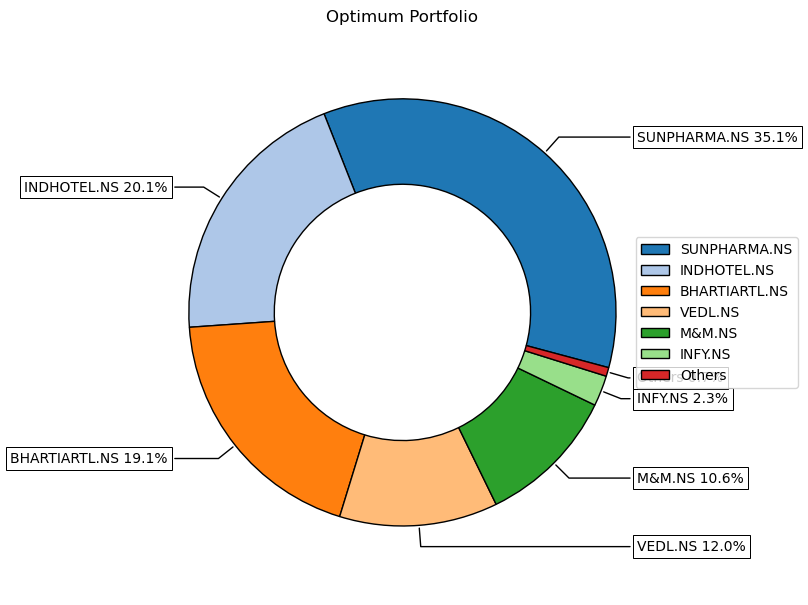

In [9]:
# Plotting the weights of the optimum portfolio

ax = rp.plot_pie (w = w, title = 'Optimum Portfolio', others = 0.01)
plt.show()

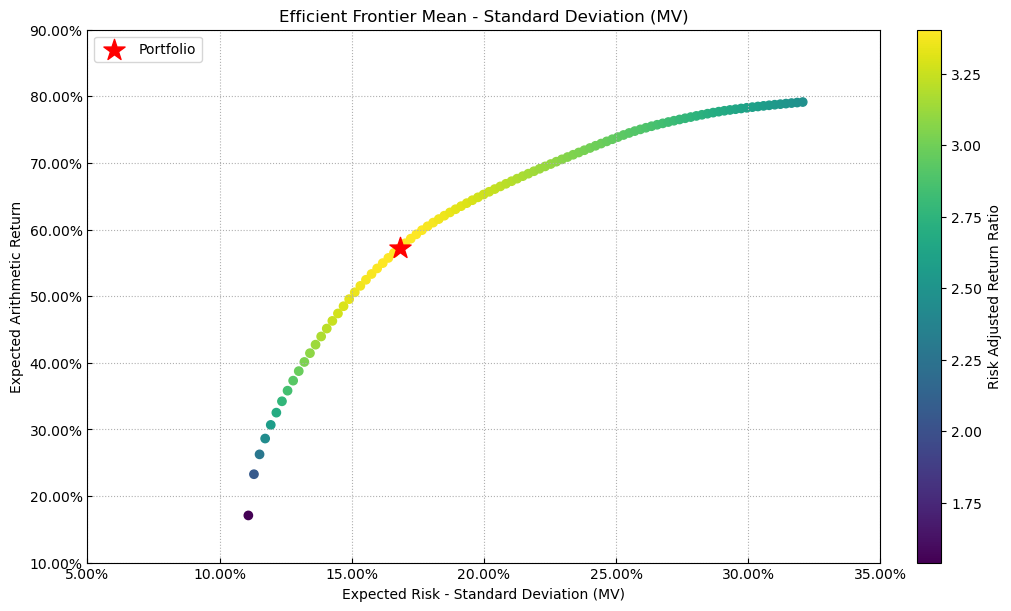

In [10]:
# Plotting the efficient frontier

frontier = port.efficient_frontier(model = model, rm = rm, points = 100, rf = rf, hist = hist)
ax = rp.plot_frontier (w_frontier = frontier, mu = port.mu, cov = port.cov, returns = returns, rm = rm, rf = rf, w = w)
plt.show()

In [11]:
# Tabulating different portfolios within the frontier

frontier

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
AUROPHARMA.NS,6.404174e-02,5.175175e-02,4.462760e-02,3.877493e-02,3.366899e-02,2.959520e-02,2.564951e-02,2.191531e-02,1.838990e-02,1.503372e-02,...,5.262359e-11,2.603741e-10,1.992387e-10,2.981339e-10,2.135620e-11,1.289136e-10,7.339257e-11,4.913477e-11,2.431494e-11,1.350649e-11
BHARTIARTL.NS,4.029753e-03,4.785090e-02,6.086514e-02,7.172855e-02,8.127615e-02,8.907001e-02,9.509128e-02,1.005656e-01,1.057340e-01,1.106565e-01,...,1.283046e-10,6.245874e-10,4.594046e-10,6.582970e-10,4.381112e-11,2.912096e-10,1.645655e-10,1.129937e-10,5.541159e-11,2.837438e-11
BPCL.NS,1.014244e-09,4.444400e-10,4.710614e-09,1.359889e-08,4.620521e-10,9.024663e-09,1.564416e-09,3.246753e-10,1.929438e-10,7.748403e-10,...,7.342658e-11,3.636624e-10,2.777977e-10,4.174947e-10,2.980445e-11,1.801324e-10,1.020304e-10,6.874723e-11,3.404969e-11,1.709912e-11
BSOFT.NS,5.255478e-10,4.734656e-11,8.639276e-10,1.389964e-09,5.773325e-11,1.144565e-09,1.816586e-10,3.902213e-11,2.882391e-11,1.116754e-10,...,2.787330e-11,1.388369e-10,1.077123e-10,1.632527e-10,1.209514e-11,7.007195e-11,4.011210e-11,2.650980e-11,1.312078e-11,9.775526e-12
HDFCBANK.NS,1.180671e-01,9.386037e-02,8.112453e-02,7.040546e-02,6.097864e-02,5.250078e-02,4.299429e-02,3.386136e-02,2.523294e-02,1.701893e-02,...,3.955635e-11,1.961068e-10,1.508545e-10,2.267774e-10,1.646989e-11,9.785374e-11,5.588992e-11,3.718888e-11,1.840037e-11,1.192879e-11
HINDUNILVR.NS,1.668382e-01,1.330421e-01,1.215018e-01,1.122008e-01,1.041436e-01,9.726996e-02,8.975106e-02,8.253564e-02,7.572334e-02,6.923536e-02,...,3.117510e-11,1.535843e-10,1.175374e-10,1.758088e-10,1.260879e-11,7.630009e-11,4.363011e-11,2.912711e-11,1.437809e-11,1.046147e-11
ICICIBANK.NS,1.010750e-01,1.111340e-01,1.149932e-01,1.174485e-01,1.193285e-01,1.203017e-01,1.209196e-01,1.214820e-01,1.220147e-01,1.225197e-01,...,6.303786e-11,3.103489e-10,2.349736e-10,3.475643e-10,2.438502e-11,1.514008e-10,8.613442e-11,5.801854e-11,2.867334e-11,1.473485e-11
INDHOTEL.NS,5.904515e-10,1.269123e-02,2.782017e-02,3.927578e-02,4.889279e-02,5.609461e-02,6.304351e-02,6.963557e-02,7.585988e-02,8.178816e-02,...,8.935465e-01,9.068357e-01,9.196608e-01,9.320755e-01,9.441241e-01,9.558439e-01,9.672662e-01,9.784180e-01,9.893226e-01,1.000000e+00
INFY.NS,3.926266e-02,5.876150e-02,6.420315e-02,6.873124e-02,7.269791e-02,7.499946e-02,7.770493e-02,8.036938e-02,8.288685e-02,8.528301e-02,...,5.728112e-11,2.818893e-10,2.134795e-10,3.156475e-10,2.216882e-11,1.375848e-10,7.835400e-11,5.272194e-11,2.605031e-11,1.376473e-11
IRCTC.NS,2.613384e-03,6.736094e-11,1.095673e-09,1.893618e-09,7.244197e-11,1.381332e-09,2.136645e-10,4.378445e-11,3.125393e-11,1.200081e-10,...,2.885835e-11,1.443680e-10,1.126519e-10,1.719782e-10,1.289734e-11,7.342241e-11,4.197883e-11,2.767867e-11,1.371831e-11,9.917827e-12


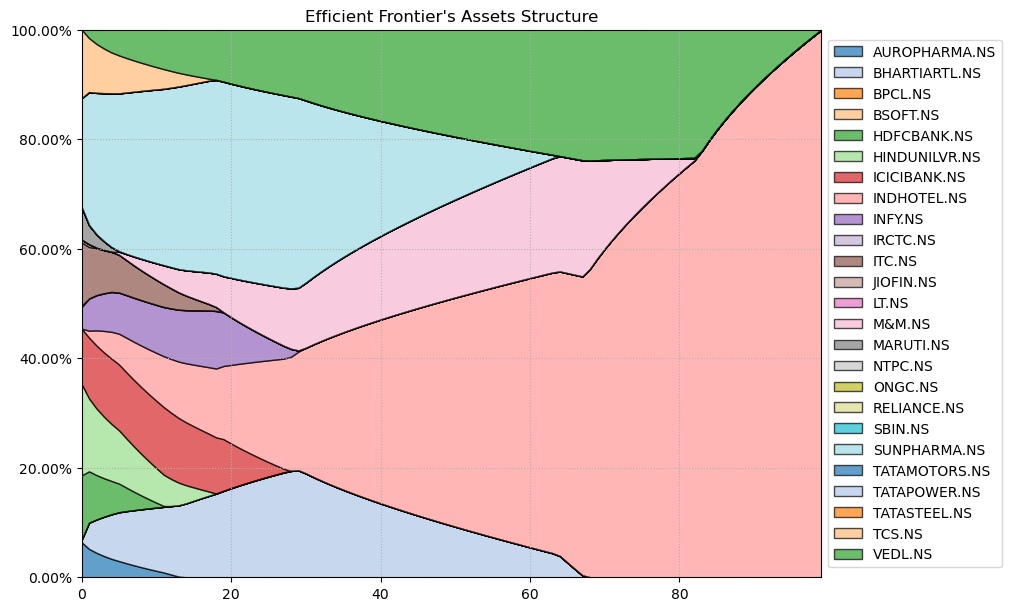

In [12]:
# Plotting the Efficient Frontier Asset Structure

ax = rp.plot_frontier_area(w_frontier = frontier)
plt.show()

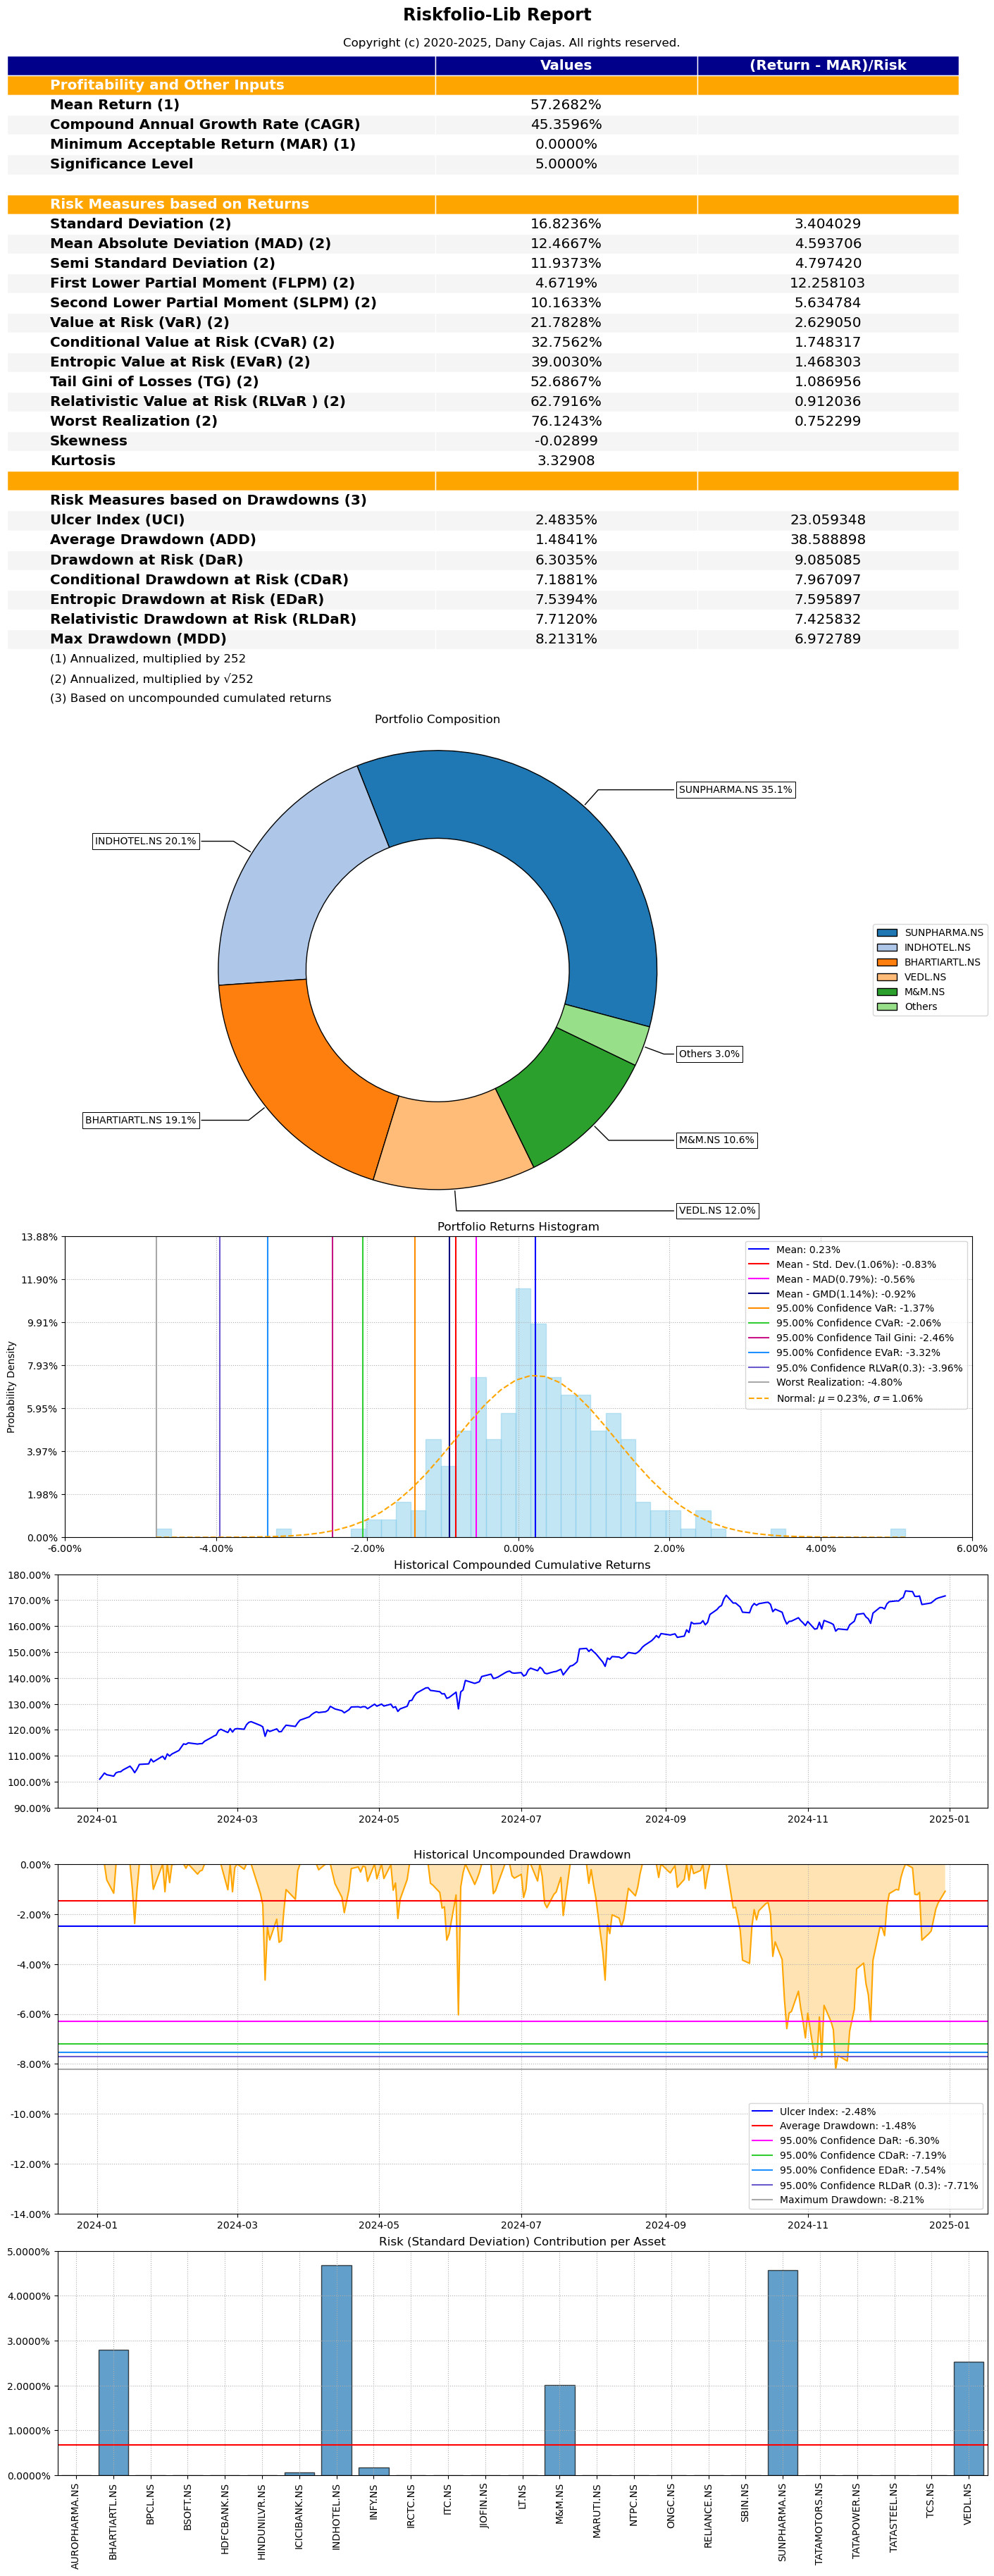

In [14]:
# Displaying the Optimum Portfolio Report

ax = rp.jupyter_report(returns, w, rm = rm)
plt.show()